In [106]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
#ucitavanje neophodnih biblioteka
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [108]:
#ucitavanje podataka
train = pd.read_csv(Path('rossmann-store-sales/train.csv'))
store = pd.read_csv(Path('rossmann-store-sales/store.csv'))
test = pd.read_csv(Path('rossmann-store-sales/test.csv'))

C:\Users\WIN10\AppData\Local\Temp\ipykernel_17264\1932461926.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(Path('rossmann-store-sales/train.csv'))


In [109]:
#prikaz prvih nekoliko redova skupa podataka za obuku
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Train dataset sadrzi 9 kolona. Kao primarni kljuc ovog seta smatramo jedinstveni identifikator filijale (Store) i Datum (Date). Ovaj slozeni kljuc je u test setu sjedinjen. Razlika izmedju trening i test seta je ta sto u trening setu imamo podatke o dnevnom pazaru i broju musterija za datu prodavnicu na odredjeni datum, dok u test setu nemamo kolone vezane za sales ili kupce. Pored toga, posedujemo podatke o otvorenosti prodavnice za konkretan datum, da li je tog dana ucestvovala u promociji (Promo), i da li je na taj datum neki drzavni praznik, ili skolski raspust.

In [110]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Store dataset sadrzi 'staticke' informacije vezane za svaku prodavnicu, ponaosob. Kolona 'Store' predstavlja jedinstvenu sifru konkretne prodavnice, gde kolone 'StoreType' i 'Assortment' objasnjavaju kojeg je radnja tipa (od mogucih 4), i kakvog joj je tipa asortiman (od moguca 3), respektivno. Naredne 3 kolone objasnjavaju udaljenost najblizeg lokala konkurenata, kao i mesec i godinu otvaranja istog. Poslednje 4 kolone su sacinjene od binarne varijable koja nam pokazuje da li ta prodavnica ucestvuje u dugorocnom programu promocije ili ne, pored toga, nedelju i godinu pocetka sprovodjenja tog programa promocije, kao i periode u godini kada taj program biva obnavljan.

In [111]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [112]:
print("Dimenzije train seta:",train.shape)
print("\n=================================\n")
print(train.dtypes)

Dimenzije train seta: (1017209, 9)


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [113]:
print("Dimenzije test seta:",test.shape)
print("\n=================================\n")
print(test.dtypes)

Dimenzije test seta: (41088, 8)


Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


Odlucujemo da spojimo stores dataset sa train i test jer on sadrzi bitne meta podatke o prodavnicama.

In [114]:
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

In [115]:
# Provera da li StoreType ima NaN vrednosti
# Ako je StoreType NaN, to znači da store_id iz tog reda ne postoji u store.csv
stores_not_in_store_df = train[train['StoreType'].isna()]

num_missing_stores_rows = stores_not_in_store_df.shape[0]

print(f"Broj redova u train setu za prodavnice koje su imale nepoznate podatke u store.csv: {num_missing_stores_rows}")

Broj redova u train setu za prodavnice koje su imale nepoznate podatke u store.csv: 0


In [116]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [117]:
print("STATISTIKA NUMERIČKIH KOLONA")
print("="*80)
        
num_cols = ['Customers', 'CompetitionDistance']
desc = train[num_cols].describe()
print(desc.round(2))

STATISTIKA NUMERIČKIH KOLONA
        Customers  CompetitionDistance
count  1017209.00           1014567.00
mean       633.15              5430.09
std        464.41              7715.32
min          0.00                20.00
25%        405.00               710.00
50%        609.00              2330.00
75%        837.00              6890.00
max       7388.00             75860.00


In [118]:
print("KATEGORIČKE VARIJABLE")
print("="*80)

cat_cols = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

for col in cat_cols:
    print(f"\n{col}:")
    counts = train[col].value_counts()
    pcts = (counts / len(train) * 100).round(2)
    summary = pd.DataFrame({'Count': counts, 'Percent': pcts})
    print(summary.head(10))

KATEGORIČKE VARIJABLE

StoreType:
            Count  Percent
StoreType                 
a          551627    54.23
d          312912    30.76
c          136840    13.45
b           15830     1.56

Assortment:
             Count  Percent
Assortment                 
a           537445    52.84
c           471470    46.35
b             8294     0.82

StateHoliday:
               Count  Percent
StateHoliday                 
0             855087    84.06
0             131072    12.89
a              20260     1.99
b               6690     0.66
c               4100     0.40

PromoInterval:
                   Count  Percent
PromoInterval                    
Jan,Apr,Jul,Oct   293122    28.82
Feb,May,Aug,Nov   118596    11.66
Mar,Jun,Sept,Dec   97460     9.58


# Data cleaning

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [120]:
num_cols = train.select_dtypes(np.number).columns
print("Broj numeričkih kolona:", len(num_cols))
print("Numeričke kolone:\n", num_cols.tolist())

cat_cols = train.select_dtypes(include=['object']).columns
print("\nBroj kategorijskih kolona:", len(cat_cols))
print("Kategorijske kolone:\n", cat_cols.tolist())

Broj numeričkih kolona: 13
Numeričke kolone:
 ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

Broj kategorijskih kolona: 5
Kategorijske kolone:
 ['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


Binarne kolone u nasem datasetu:

* Open              # 0 = zatvoreno, 1 = otvoreno
* Promo             # 0 = bez promocije, 1 = sa promocijom
* SchoolHoliday     # 0 = nije školski praznik, 1 = jeste
* Promo2            # 0 = ne učestvuje u Promo2, 1 = učestvuje

In [121]:
# Proveravamo jel ima duplikata slozenog kljuca store i date
dup_cols = train.duplicated(subset=['Store', 'Date'], keep=False)
dup_cols.sum()  # Broj duplikata slozenog kljuca    

np.int64(0)

In [122]:
#konvertujemo date kolonu u datetime format
train['Date']= pd.to_datetime(train['Date'])
test['Date']= pd.to_datetime(test['Date'])

In [123]:
#primecujemo da postoje dve vrednosti 0 od kojih e jedna tipa string a druga integer
print(train['StateHoliday'].value_counts())
train['StateHoliday'].apply(type).value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


StateHoliday
<class 'str'>    886137
<class 'int'>    131072
Name: count, dtype: int64

In [124]:
# Konvertujemo sve vrednosti u stringove
train['StateHoliday'] = train['StateHoliday'].astype(str).str.strip()
train['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [125]:
for col in cat_cols:
    print(f"Column: {col}")
    print(train[col].value_counts(dropna=False))
    print("-"*50 + "\n")

Column: Date
Date
2013-01-02    1115
2015-07-31    1115
2015-07-30    1115
2015-07-29    1115
2015-07-28    1115
              ... 
2014-12-28     935
2014-12-26     935
2014-12-25     935
2014-12-24     935
2014-12-23     935
Name: count, Length: 942, dtype: int64
--------------------------------------------------

Column: StateHoliday
StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64
--------------------------------------------------

Column: StoreType
StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64
--------------------------------------------------

Column: Assortment
Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64
--------------------------------------------------

Column: PromoInterval
PromoInterval
NaN                 508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64
--------------------------------------------------



In [126]:
nan_interval_rows = train[train['PromoInterval'].isna()]

all_nan_are_promo2_zero = (nan_interval_rows['Promo2'] == 0).all()

print(f"Ukupan broj NaN vrednosti u PromoInterval: {train['PromoInterval'].isna().sum()}")
print(f"Provera: Da li su sve te NaN vrednosti vezane za Promo2 = 0? {all_nan_are_promo2_zero}")


Ukupan broj NaN vrednosti u PromoInterval: 508031
Provera: Da li su sve te NaN vrednosti vezane za Promo2 = 0? True


Odlucujemo da ih zamenimo sa 'No Promo2' jer ukazuju na to da nije bilo promocija. Na osnovu toga zakljucujemo da Promo2SinceWeek i Promo2SinceYear imaju isti problem tako da cemo ih popuniti istim vrednostima 'No Promo2' i 0 za numericke.


In [127]:
for col in train.columns[1:]:
    print(f"\n{col}:")
    unique_vals = train[col].unique()
    nan_count = train[col].isna().sum()
    
    garbage = [val for val in unique_vals if pd.isna(val) or str(val).strip() in ['', '-', '/', '?', '*', '_', ' ']]
    if garbage:
        print(f"Garbage found: {garbage}")
    else:
        print(f"Column {col} is clean!")
    
    print(f"Number of NaN values: {nan_count}")



DayOfWeek:
Column DayOfWeek is clean!
Number of NaN values: 0

Date:
Column Date is clean!
Number of NaN values: 0

Sales:
Column Sales is clean!
Number of NaN values: 0

Customers:
Column Customers is clean!
Number of NaN values: 0

Open:
Column Open is clean!
Number of NaN values: 0

Promo:
Column Promo is clean!
Number of NaN values: 0

StateHoliday:
Column StateHoliday is clean!
Number of NaN values: 0

SchoolHoliday:
Column SchoolHoliday is clean!
Number of NaN values: 0

StoreType:
Column StoreType is clean!
Number of NaN values: 0

Assortment:
Column Assortment is clean!
Number of NaN values: 0

CompetitionDistance:
Garbage found: [np.float64(nan)]
Number of NaN values: 2642

CompetitionOpenSinceMonth:
Garbage found: [np.float64(nan)]
Number of NaN values: 323348

CompetitionOpenSinceYear:
Garbage found: [np.float64(nan)]
Number of NaN values: 323348

Promo2:
Column Promo2 is clean!
Number of NaN values: 0

Promo2SinceWeek:
Garbage found: [np.float64(nan)]
Number of NaN values:

* CompetitionDistance: Ovo su nedostajuće vrednosti koje mogu biti uzrokovane time što ne postoji konkurencija u blizini ili je rastojanje jednostavno nepoznato.
Obzirom na to da su NaN vrednosti malobrojne (samo 2,642), najbolji pristup je koriscenje mediane za zamenu NaN vrednosti (bolja zbog autlajera)

Za atribute CompetitionOpenSince prvo cemo proveriti da li NaN vrednosti postoje usled nepostojanja konkurenata (CompetitionDistance nije zadata ili je jednaka nuli) ili jednostavno predstavljaju prave nedostajuce vrednosti.

In [128]:
mask = train['CompetitionOpenSinceMonth'].isna() & train['CompetitionOpenSinceYear'].isna()

subset = train.loc[mask, ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

print("Number of stores with both CompetitionOpenSinceMonth and Year null:", subset.shape[0])
print(subset.head(10))

Number of stores with both CompetitionOpenSinceMonth and Year null: 323348
    CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear
11               1070.0                        NaN                       NaN
12                310.0                        NaN                       NaN
15               3270.0                        NaN                       NaN
18               3240.0                        NaN                       NaN
21               1040.0                        NaN                       NaN
25               2300.0                        NaN                       NaN
28               2170.0                        NaN                       NaN
31               2910.0                        NaN                       NaN
39                180.0                        NaN                       NaN
40               1180.0                        NaN                       NaN


Nedostajuce vrednosti atributa CompetitionOpenSinceYear cemo aproksimirati medianom, a za nominalni atribut CompetitionOpenSinceMonth koristicemo mesec koji se najcesce pojavljuje.

Sve ove zakljucke cemo kasnije primeniti u pipeline-u.

In [129]:
def check_binary_columns(df, binary_cols):
    """Provera da li su kolone stvarno binarne (0/1)"""
    for col in binary_cols:
        unique_vals = df[col].unique()
        print(f"{col}: {sorted(unique_vals)}")
        if not set(unique_vals).issubset({0, 1}):
            print(f"NIJE BINARNA!")
        else:
            print(f"OK")

# Upotreba:
binary_cols = ['Open', 'Promo', 'SchoolHoliday', 'Promo2']
check_binary_columns(train, binary_cols)


Open: [np.int64(0), np.int64(1)]
OK
Promo: [np.int64(0), np.int64(1)]
OK
SchoolHoliday: [np.int64(0), np.int64(1)]
OK
Promo2: [np.int64(0), np.int64(1)]
OK


# Generisanje target kolone i izdvajanje subseta

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Kreiramo pomocnu klasu kako bi napravili novu kategoricku target kolonu

To znaci da za svaku prodavnicu i svaki dan se racuna prosek prodaje te prodavnice u poslednjih 30 dana i onda na osnovu toga pravimo novu kolonu sa 1 ili 0 u zavisnosti od tog da li je prodaja tog dana veca ili manja od tog prethodnoh 30dnevnog proseka.

Obzirom da necemo imati informacije za prvih 30 dana (jer ne mozemo da odradimo prosek), te podatke cemo ukloniti.


In [131]:

#zbog problema vremenskih serija, prvo cemo sortirati podatke po datumu
train['Date']= pd.to_datetime(train['Date'])

train= train.sort_values(by="Date", ascending= True)


helper_df= pd.DataFrame()


stores= train['Store'].unique()

for store in stores:
    store_data= train[train['Store']== store].copy()
    
    store_data['30_a']= store_data['Sales'].rolling(window=30).mean()
    store_data['target']= (store_data['Sales'].shift(-1) > store_data['30_a']).astype(int)
    
    store_data = store_data.dropna(subset=['30_a'])

    helper_df=pd.concat([helper_df, store_data], ignore_index=True)

helper_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,30_a,target
380901,229,7,2015-05-03,0,0,0,0,0,0,d,c,17410.0,4.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7032.733333,1
717073,1035,7,2014-08-03,0,0,0,0,0,0,a,a,27150.0,NaN,NaN,0,NaN,NaN,NaN,3882.733333,1
129396,514,2,2013-06-18,5737,607,1,1,0,0,c,c,1200.0,7.0,2012.0,1,27.0,2012.0,"Jan,Apr,Jul,Oct",4175.800000,1
235158,457,4,2015-02-26,4155,370,1,0,0,0,d,c,13140.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4319.133333,1
148106,498,2,2014-03-18,6565,854,1,1,0,0,a,a,990.0,NaN,NaN,1,40.0,2014.0,"Jan,Apr,Jul,Oct",5799.633333,1
105193,332,5,2013-09-06,2803,424,1,0,0,0,a,a,1840.0,3.0,2006.0,0,NaN,NaN,NaN,2862.033333,0
212959,432,1,2015-05-11,11497,1802,1,0,0,1,a,a,810.0,5.0,2013.0,0,NaN,NaN,NaN,10100.433333,1
657304,1103,4,2015-05-21,6101,473,1,1,0,0,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",4985.633333,1
759282,637,7,2013-03-10,0,0,0,0,0,0,d,c,9790.0,NaN,NaN,1,31.0,2009.0,"Feb,May,Aug,Nov",6491.100000,1
230313,469,2,2013-11-19,13205,1562,1,1,0,0,c,c,710.0,9.0,2005.0,0,NaN,NaN,NaN,9546.866667,1


In [132]:
train= helper_df 
#kasnije cemo uklaniti kolone na osnovu kojih smo napravili pomocnu izlaznu varijablu

### Uzimanje subseta podataka za dalju analizu

In [133]:
# Biramo 10 prodavnica za koje imamo najvise redova (koje postoje u oba seta)
top_10 = train['Store'].value_counts().nlargest(10).index
df_top10 = train[train['Store'].isin(top_10)]

# Pravimo vremenski cutoff, gde posmatramo samo poslednje 2 godine
cutoff = df_top10['Date'].max() - pd.DateOffset(years=2)
df_top10 = df_top10[df_top10['Date'] >= cutoff]

In [134]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7310 entries, 182 to 983232
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      7310 non-null   int64         
 1   DayOfWeek                  7310 non-null   int64         
 2   Date                       7310 non-null   datetime64[ns]
 3   Sales                      7310 non-null   int64         
 4   Customers                  7310 non-null   int64         
 5   Open                       7310 non-null   int64         
 6   Promo                      7310 non-null   int64         
 7   StateHoliday               7310 non-null   object        
 8   SchoolHoliday              7310 non-null   int64         
 9   StoreType                  7310 non-null   object        
 10  Assortment                 7310 non-null   object        
 11  CompetitionDistance        7310 non-null   float64       
 12  Competi

In [135]:
df_top10.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth    2924
CompetitionOpenSinceYear     2924
Promo2                          0
Promo2SinceWeek              3655
Promo2SinceYear              3655
PromoInterval                3655
30_a                            0
target                          0
dtype: int64

In [136]:
df_top10["Year"] = df_top10["Date"].dt.year
df_top10["Month"] = df_top10["Date"].dt.month
df_top10["Day"] = df_top10["Date"].dt.day
df_top10["IsWeekend"] = df_top10["DayOfWeek"].isin([6,7]).astype(int)

test["Year"] = test["Date"].dt.year
test["Month"] = test["Date"].dt.month
test["Day"] = test["Date"].dt.day
test["IsWeekend"] = test["DayOfWeek"].isin([6,7]).astype(int)

Kreirali smo nove atribute Year, Month, Day, IsWeekend kako bismo eventualno otkrili dodatne zakonitosti u podacima.

*Sve sto je uradjeno u okviru train seta mora biti uradjeno i na test setu. Kasnije smo tu logiku implementirali u okviru pipeline-a*

In [137]:
df_top10['StateHoliday'] = df_top10['StateHoliday'].replace('0', 'none')
df_top10['StateHoliday'] = df_top10['StateHoliday'].replace('a', 'public_holiday')
df_top10['StateHoliday'] = df_top10['StateHoliday'].replace('b', 'Easter_holiday')
df_top10['StateHoliday'] = df_top10['StateHoliday'].replace('c', 'Christmas')

test['StateHoliday'] = test['StateHoliday'].replace('0', 'none')
test['StateHoliday'] = test['StateHoliday'].replace('a', 'public_holiday')
test['StateHoliday'] = test['StateHoliday'].replace('b', 'Easter_holiday')
test['StateHoliday'] = test['StateHoliday'].replace('c', 'Christmas')

df_top10['Assortment'] = df_top10['Assortment'].replace('a', 'basic')
df_top10['Assortment'] = df_top10['Assortment'].replace('b', 'extra')
df_top10['Assortment'] = df_top10['Assortment'].replace('c', 'extended')

test['Assortment'] = test['Assortment'].replace('a', 'basic')
test['Assortment'] = test['Assortment'].replace('b', 'extra')
test['Assortment'] = test['Assortment'].replace('c', 'extended')

Ubacili smo stvarne vrednosti umesto oznaka u pojednim kolonama kako bi lakše interpretirali analizu i model.

# Exploritary Data Analysis

In [138]:
# uzimamo kopiju podataka da ne bismo menjali originalni skup podataka
df_eda = df_top10.copy()

In [139]:
df_eda.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,30_a,target,Year,Month,Day,IsWeekend
182,1115,3,2013-07-31,6209,421,1,1,none,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4670.600000,1,2013,7,31,0
183,1115,4,2013-08-01,5745,378,1,1,none,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4636.966667,1,2013,8,1,0
184,1115,5,2013-08-02,5824,389,1,1,none,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4618.766667,1,2013,8,2,0
185,1115,6,2013-08-03,5576,430,1,0,none,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4601.266667,0,2013,8,3,1
186,1115,7,2013-08-04,0,0,0,0,none,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4378.800000,0,2013,8,4,1


In [140]:
def categorical_summary(df):
    """Statistika kategoričkih kolona"""
    print("\n" + "="*80)
    print("KATEGORIČKE VARIJABLE")
    print("="*80)
    
    cat_cols = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
    
    for col in cat_cols:
        print(f"\n{col}:")
        counts = df[col].value_counts()
        pcts = (counts / len(df) * 100).round(2)
        summary = pd.DataFrame({'Count': counts, 'Percent': pcts})
        print(summary.head(10))

categorical_summary(df_eda)


KATEGORIČKE VARIJABLE

StoreType:
           Count  Percent
StoreType                
a           5117     70.0
d           2193     30.0

Assortment:
            Count  Percent
Assortment                
extended     4386     60.0
basic        2924     40.0

StateHoliday:
                Count  Percent
StateHoliday                  
none             7102    97.15
public_holiday    128     1.75
Christmas          40     0.55
Easter_holiday     40     0.55

PromoInterval:
                  Count  Percent
PromoInterval                   
Jan,Apr,Jul,Oct    2193     30.0
Mar,Jun,Sept,Dec    731     10.0
Feb,May,Aug,Nov     731     10.0


Na osnovu prikazane statistike, primetna je visoka neuravnoteženost distribucije u većini ključnih kategorija. Dominantna uočljivost je da tip prodavnice 'a' čini 70% uzorka, dok je 'extended' asortiman prisutan u 60% podataka. Što se tiče praznika, velika većina prodaje (97.15%) se dešava na dane kada nema državnog praznika (none), što je i očekivano za poslovne dane, a ostali praznici čine zanemariv procenat. Kod varijable PromoInterval uočljivo je da je interval Jan,Apr,Jul,Oct dominantan 30%, dok poslednje dve kategorije čini samo zajedno 20%. Model ce imati mnogo više podataka za učenje o standardnoj prodaji, tipu 'a' prodavnice i 'extended' asortimanu.

In [141]:
num_cols = ['Sales', 'Customers', 'CompetitionDistance','Promo2SinceWeek']
desc = df_eda[num_cols].describe()
print(desc.round(2))

          Sales  Customers  CompetitionDistance  Promo2SinceWeek
count   7310.00    7310.00              7310.00          3655.00
mean    5697.00     584.67              6346.00            27.20
std     3567.05     375.62              6080.58             8.13
min        0.00       0.00               100.00            18.00
25%     3779.75     335.00              1150.00            22.00
50%     5914.00     573.00              4400.00            22.00
75%     7752.75     881.00             11120.00            37.00
max    26590.00    2197.00             17650.00            37.00


Numeričke kolone pokazuju značajnu varijabilnost. Prodaja i broj kupaca imaju blagu asimetriju, ali je najuočljivija ekstremna desna asimetrija u koloni CompetitionDistance

In [142]:
def binary_eda(df, binary_cols):
    for col in binary_cols:
        print(f"{col}:")
        counts = df[col].value_counts().sort_index()
        
        for val, count in counts.items():
            pct = count / len(df) * 100
            print(f"   {val}: {count:,} ({pct:.1f}%)")
        
        # Ako je Open=1, gledaj impact na Sales
        if col != 'Open' and 'Sales' in df.columns:
            impact = df[df['Open']==1].groupby(col)['Sales'].mean()
            if len(impact) == 2:
                lift = (impact[1] / impact[0] - 1) * 100
                print(f" Sales Lift: {lift:+.1f}%")

binary_cols = ['Open', 'Promo', 'SchoolHoliday', 'Promo2']
binary_eda(df_eda, binary_cols)

Open:
   0: 1,256 (17.2%)
   1: 6,054 (82.8%)
Promo:
   0: 4,530 (62.0%)
   1: 2,780 (38.0%)
 Sales Lift: +47.6%
SchoolHoliday:
   0: 5,972 (81.7%)
   1: 1,338 (18.3%)
 Sales Lift: +4.0%
Promo2:
   0: 3,655 (50.0%)
   1: 3,655 (50.0%)
 Sales Lift: +11.0%


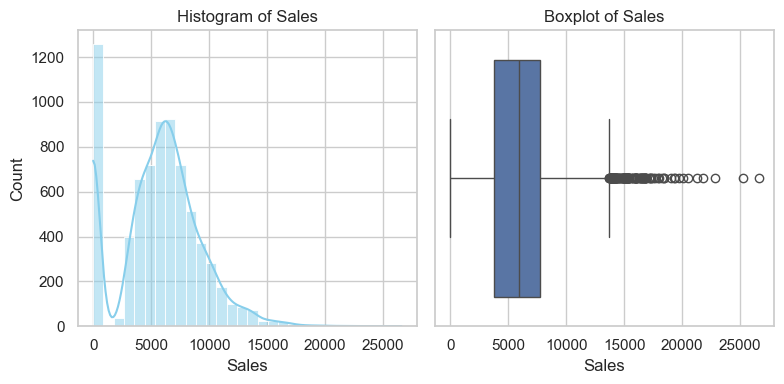

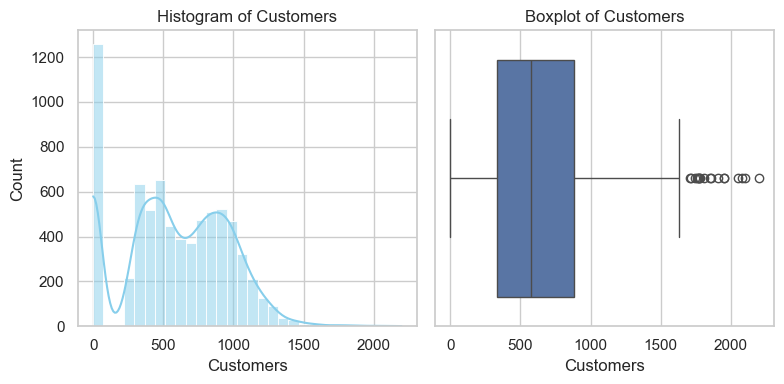

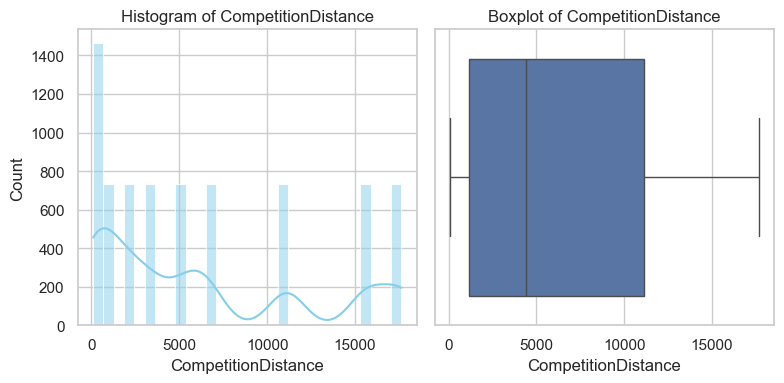

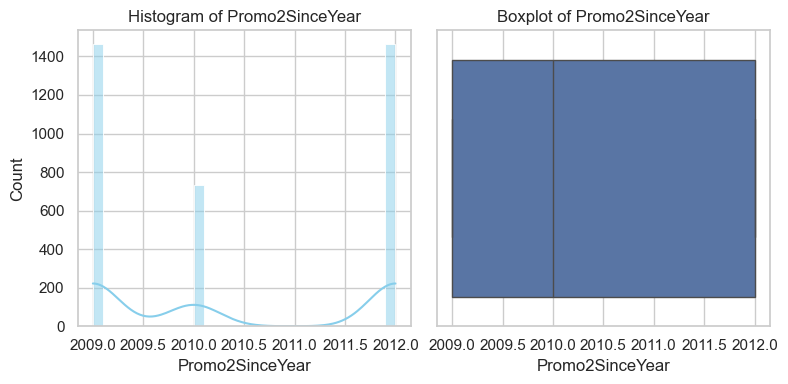

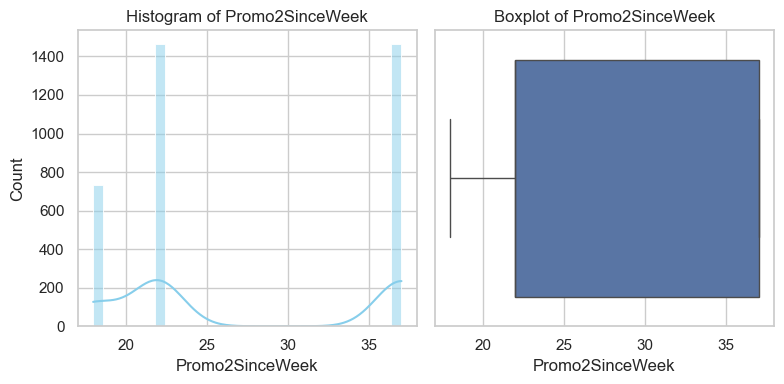

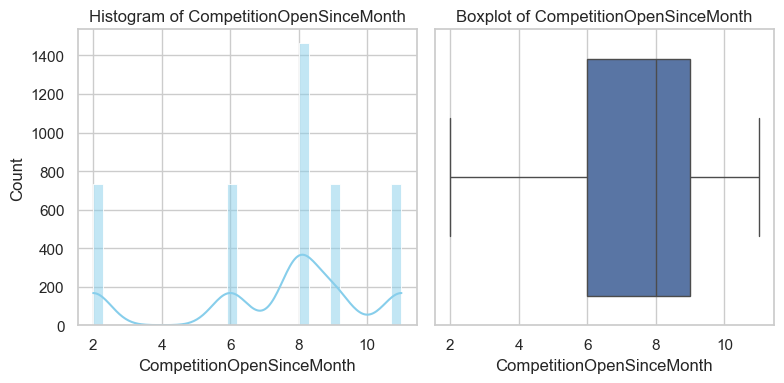

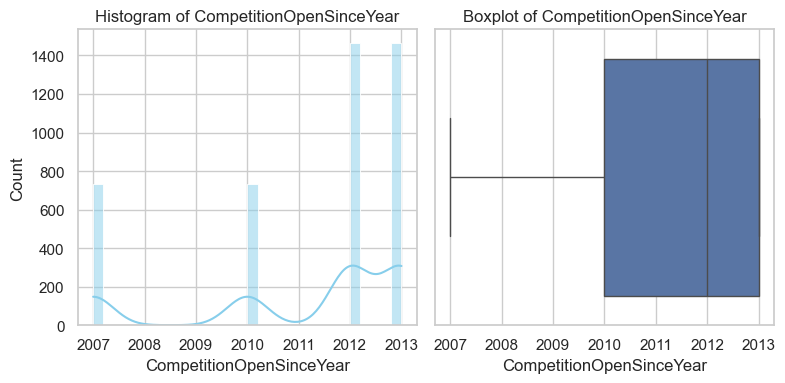

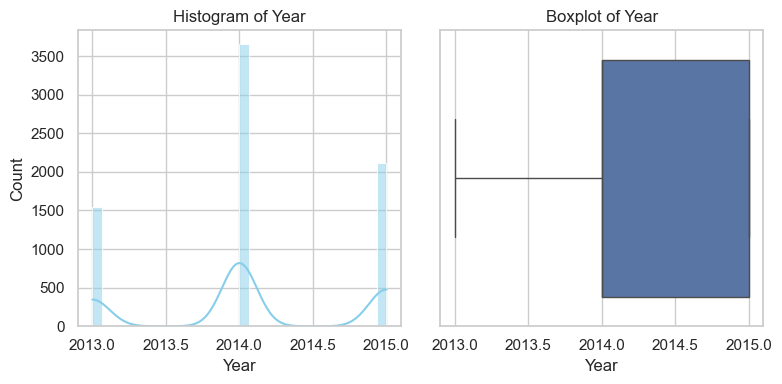

In [143]:
numerical_cols = ['Sales', 'Customers', 'CompetitionDistance','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Year']

sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    sns.histplot(df_eda[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1,2,2)
    sns.boxplot(x=df_eda[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

Mozemo zakljuciti da outleri postoje u okviru Sales i Customers atributa.

*Sobzirom da se oni neće koristiti prilikom kreiranja modela (Sales je atribut od koga smo kreirali izlazni atribut, a Customers je direktno korelisan sa izlaznim atributom i ne nalazi se u test setu) u okviru pipelina nećemo obradjivati outliere.*

In [144]:
df_eda[numerical_cols].describe()

,Sales,Customers,CompetitionDistance,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Year
count,7310.000000,7310.000000,7310.000000,3655.000000,3655.000000,4386.000000,4386.000000,7310.000000
mean,5697.002052,584.671272,6346.000000,2010.400000,27.200000,7.333333,2011.166667,2014.079343
std,3567.050714,375.618483,6080.575789,1.356652,8.134993,2.809037,2.115004,0.703176
min,0.000000,0.000000,100.000000,2009.000000,18.000000,2.000000,2007.000000,2013.000000
25%,3779.750000,335.000000,1150.000000,2009.000000,22.000000,6.000000,2010.000000,2014.000000
50%,5914.000000,573.000000,4400.000000,2010.000000,22.000000,8.000000,2012.000000,2014.000000
75%,7752.750000,881.000000,11120.000000,2012.000000,37.000000,9.000000,2013.000000,2015.000000
max,26590.000000,2197.000000,17650.000000,2012.000000,37.000000,11.000000,2013.000000,2015.000000


Uočavamo da naši atribut imaju različite skale, što nije pogodno za korišćenje u algoritimima koji svoje mere sličnosti zasnivaju na geometrijskim merama udaljenosti.

 *U okviru našeg projekta koristićemo Desicion Tree, Random Forest i Boosting algoritam pa skaliranje atributa nije neophodno.*

Sada želimo da ispitamo koji atributi su značajni za predvidjanje prodaje. Za numeričke atribute koristićemo korelacionu matricu a za kategoričke atribute prikazaćemo distribuciju Sales atributa u ondosu na njih.

*Kako bismo mogli da prikažemo korelacionu matricu Pandas implementacija zahteva da atributi nemaju NaN vrednosti pa ćemo ih ovde obraditi samo radi adekvatnog prikaza*

In [145]:
df_eda['CompetitionDistance'] = df_eda['CompetitionDistance'].fillna(df_eda['CompetitionDistance'].median())

most_frequent_month = df_eda["CompetitionOpenSinceMonth"].value_counts().idxmax()
df_eda["CompetitionOpenSinceMonth"] = df_eda["CompetitionOpenSinceMonth"].fillna(most_frequent_month)
df_eda["CompetitionOpenSinceYear"] = df_eda["CompetitionOpenSinceYear"].fillna(round(df_eda["CompetitionOpenSinceYear"].median()))

df_eda['Promo2SinceWeek']=df_eda['Promo2SinceWeek'].fillna(0)
df_eda['Promo2SinceYear']=df_eda['Promo2SinceYear'].fillna(0)

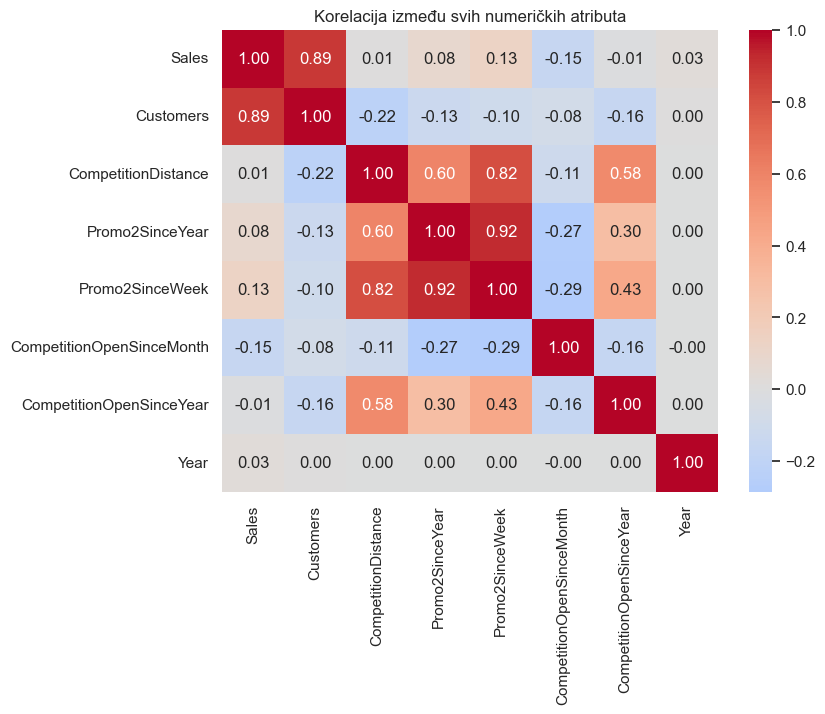

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df_eda[numerical_cols]
# Korelaciona matrica
corr_matrix = numeric_features.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Korelacija između svih numeričkih atributa")
plt.show()


Na osnovu korelacione matrice vidimo da je atribut Sales (a samim tim i naš target atribut) najviše korelisan sa atributima Customers ali test set ne sadrži taj atribut pa ga nećemo razmatrati. Takodje vidimo da je atribut Promo2SinceWeek jako korelisan sa atributima CompetitionDistance i Promo2SinceYear pa cemo ga ukloniti prilikom modelovanja.

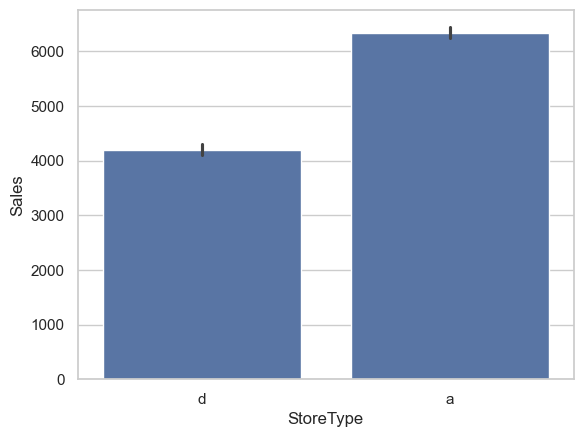

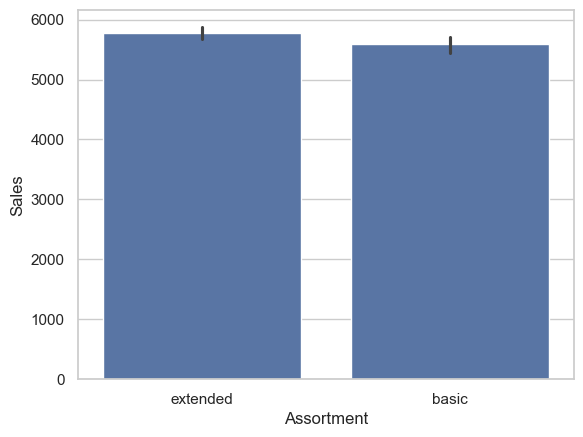

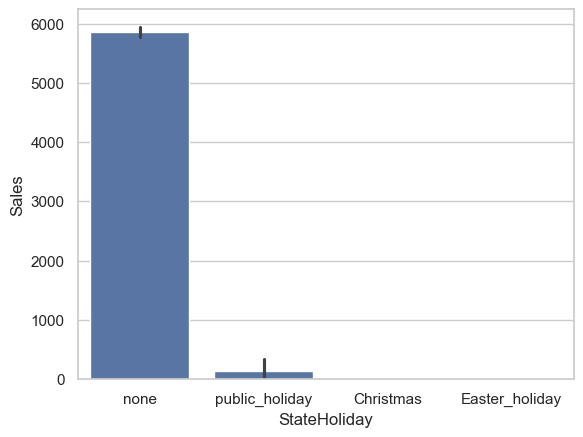

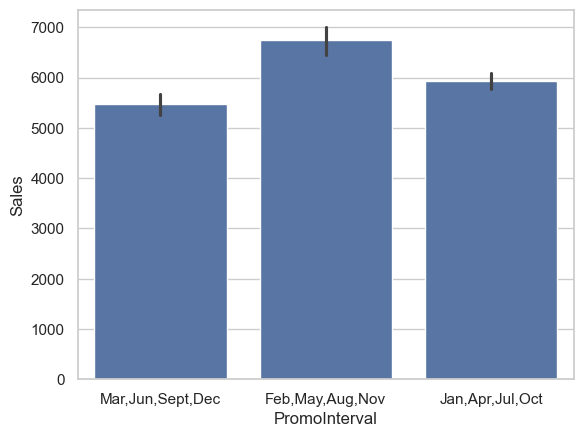

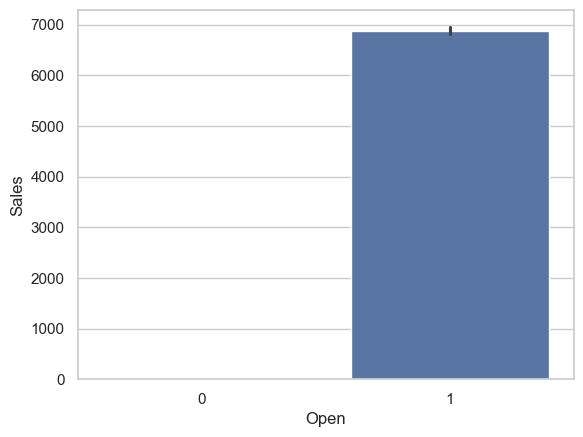

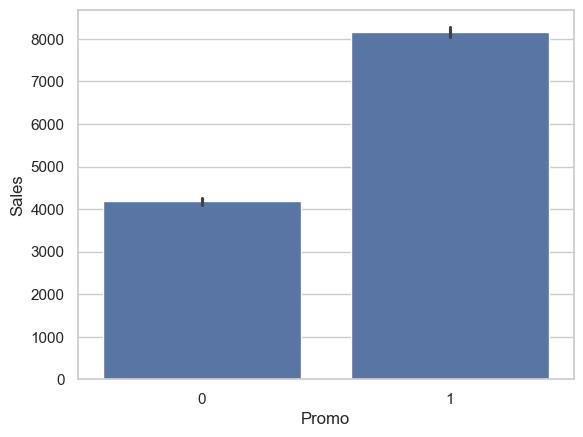

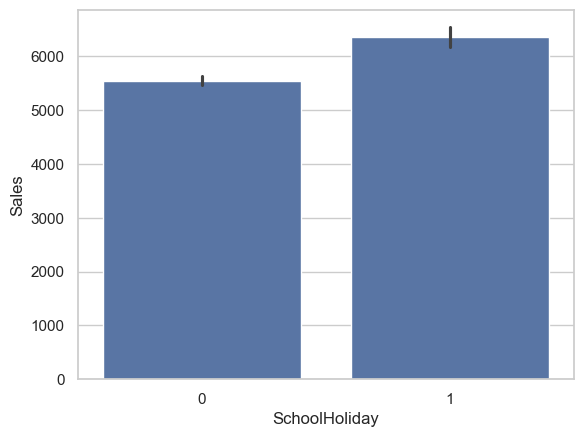

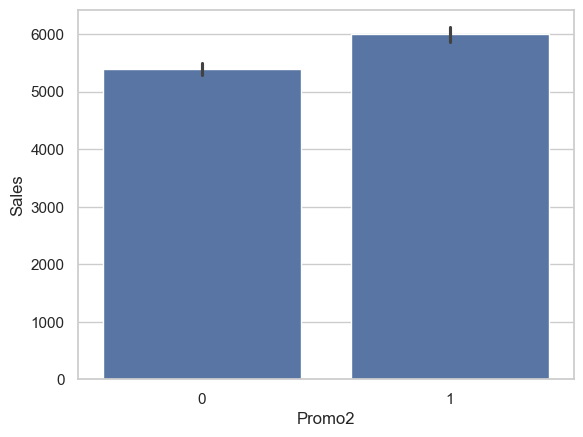

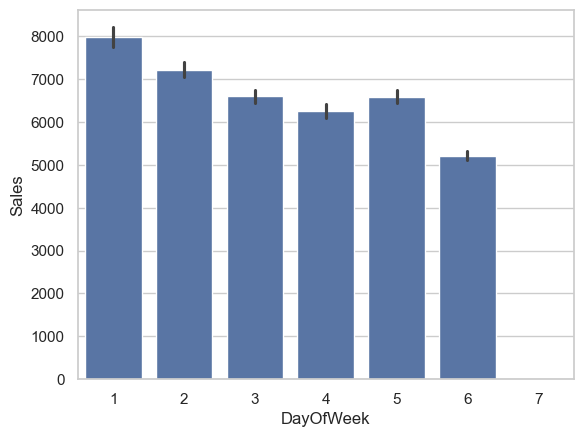

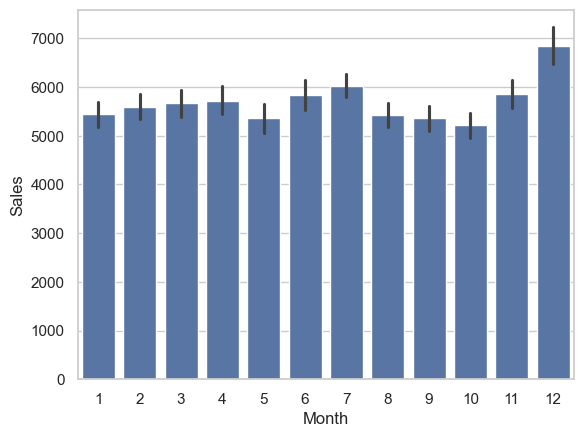

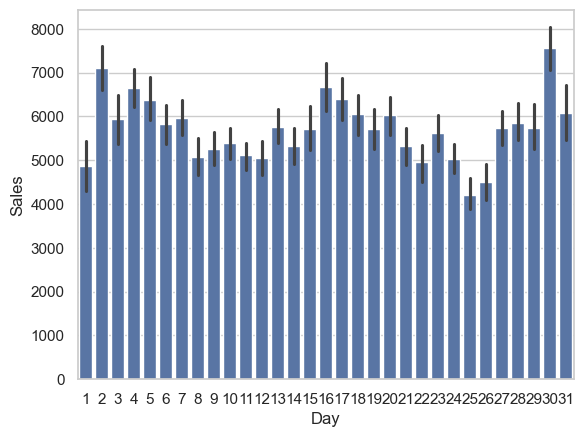

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval','Open', 'Promo', 'SchoolHoliday', 'Promo2','DayOfWeek','Month','Day']

for col in categorical_features:
    sns.barplot(x=col, y='Sales', data=df_eda)
    plt.show()


Primećujemo da se vrednosti Sales atributa mogu varirati manje ili vise u odnosu na većinu kategoričkih ordinalnih atributa, te da skoro svi atributi imaju barem neki uticaj na prodaju. Najvažniji uvidi su: Promocije (Promo=1) drastično povećavaju prodaju. Najveća prodaja je prvog dana u nedelji (Dan 1), dok je najmanja vikendom (Dani 6 i 7). Tip prodavnice 'a' ostvaruje znatno veći prosek prodaje od tipa 'd'. Prodaja je najveća u decembru (Mesec 12), a najviša prosečna prodaja tokom promotivnih intervala se ostvaruje u februaru, maju, avgustu i novembru.

*U procesu modelovanja odlučeno je da se u početnu fazu uključe svi raspoloživi atributi izuzev Promo2SinceWeek atributa.
Pošto je veličina podataka prethodno smanjena radi lakše manipulacije i analize, zadržavanje svih atributa omogućava da se zadrži što više informacija koje mogu biti relevantne za predviđanje.*

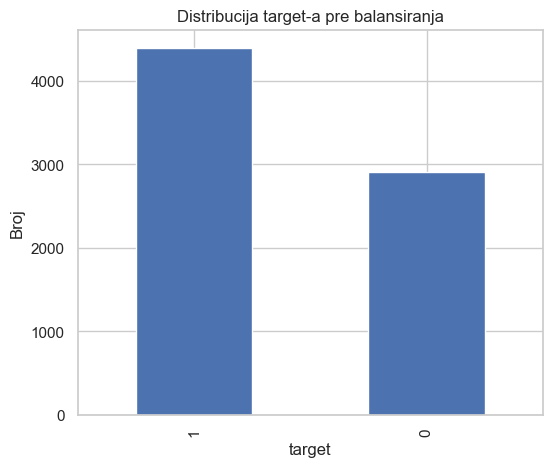

In [148]:
plt.figure(figsize=(6,5))
df_eda['target'].value_counts().plot(kind='bar')
plt.title("Distribucija target-a pre balansiranja")
plt.xlabel("target")
plt.ylabel("Broj")
plt.show()

Na grafiku vidimo da postoji velika razlika u broju instanci različitih klasa tj. postoji problem ne-balansirane klasifikacije.

*Koristićemo balansirano otežavanje (class_weight='balanced') u okviru modela koje automatski dodeljuje veću težinu manjinskoj klasi, a manju većinskoj, u zavisnosti od njihovog broja u skupu podataka. Koristi se kako bi se modelu omogućilo da bolje uči obrasce iz manje zastupljene klase i da ne favorizuje većinsku klasu tokom treniranja.*

## Recap uradjenog

| Kolona | Urađeni koraci / Odluke |
|---------|--------------------------|
| Store, DayOfWeek, Sales, Customers, Open, Promo, SchoolHoliday | Nije bilo potrebne imputacije niti tretmana “garbage” vrednosti jer su kolone bile čiste. |
| Date | Kolona je konvertovana u datetime format. Napravljene su nove promenljive Day, Month, Year. |
| StateHoliday, StoreType, Assortment, PromoInterval | Ove kategorijske kolone su pripremljene za kodiranje (One-Hot Encoding) unutar Pipeline-a. |
| Promo2 | Nije bilo potrebne imputacije niti null vrednosti. |
| PromoInterval | NaN vrednosti su popunjene novom kategorijom 'No Promo2', jer nedostaju samo tamo gde je Promo2=0, čime je nedostatak informacije pretvoren u smislenu kategoriju. |
| Promo2SinceWeek, Promo2SinceYear | NaN vrednosti su popunjene konstantnom vrednošću 0 (imputacija konstantom), jer označavaju odsustvo promocije (Promo2=0). |
| CompetitionDistance | Malobrojne NaN vrednosti su imputirane medijanom kolone, jer je medijana robusna na outlier-e i smislenija od proseka. |
| CompetitionOpenSinceMonth, CompetitionOpenSinceYear | NaN vrednosti za Year su popunjene medijanom, a za Month modusom. |


# Treniranje

## Podela na train i test 

*Podelu df_top10 na train i test smo odradili kako bi mogli da odradimo performanse modela sobzirom da test set koji nam je dat ne sadrzi izlaznu varijablu.*

Pre nego što izvršimo podelu uklonićemo odredjene atribute u okviru df_top10 i test seta koji su nam već dati. 

In [149]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'IsWeekend'],
      dtype='object')

In [150]:
test = test.drop(columns=['Id', 'Store','Promo2SinceWeek'], errors='ignore')
test.shape

(41088, 18)

In [151]:
df_top10.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', '30_a', 'target', 'Year', 'Month',
       'Day', 'IsWeekend'],
      dtype='object')

In [152]:
df_top10 = df_top10.drop(columns=['Store','Sales','Customers','30_a','Promo2SinceWeek'], errors='ignore')
df_top10.shape

(7310, 19)

Atribute ID i Store smo uklonili zato što oni predstavljaju jedinstvene identifikatore. Sales i 30_a su atributi koje smo koristili za kreiranje izlaznog atributa pa cemo ih zbog toga ukloniti. Atribut Customers se ne nalazi u test setu i direktno je korelisan sa izlaznim atributom pa ga je potrebno izostaviti prilikom modelovanja. Za atribut Promo2SinceWeek smo ustanovili da je snazno korelisan sa ostalim atributima pa bi njegovo ukljucivanja uzrokovalo nepotrebnu kompleksnost.

In [153]:
# Delimo test deo na poslednjih 5 meseci, i trening na prvih 19
cuttoff_TTsplit= df_top10['Date'].max()- pd.DateOffset(months=5)

train=df_top10[df_top10['Date']<=cuttoff_TTsplit]
test=df_top10[df_top10['Date']>cuttoff_TTsplit]

In [154]:
X_train= train.drop(columns=['target'])
y_train= train['target']

X_test= test.drop(columns=['target'])
y_test= test['target']

In [155]:
X_train = X_train.drop(columns=['Date'], errors='ignore')
X_test = X_test.drop(columns=['Date'], errors='ignore')
test = test.drop(columns=['Date'], errors='ignore')

In [156]:
X_train.columns

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'IsWeekend'],
      dtype='object')

Na kraju smo uklonili i Date varijablu jer smo nju iskoristili za kreiranje novih atributa koje ćemo koristiti u modelu.

## Definisanje preprocesa

In [157]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [158]:
X_train['PromoInterval'] = X_train['PromoInterval'].fillna('NoPromo2')
X_test['PromoInterval'] = X_test['PromoInterval'].fillna('NoPromo2')
test['PromoInterval'] =test['PromoInterval'].fillna('NoPromo2')

cat_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('CompetitionDistance', SimpleImputer(strategy='median'), ['CompetitionDistance']),
    ('CompetitionOpenSinceMonth', SimpleImputer(strategy='most_frequent'), ['CompetitionOpenSinceMonth']),
    ('CompetitionOpenSinceYear', SimpleImputer(strategy='median'), ['CompetitionOpenSinceYear']),
    ('Promo2SinceYear', SimpleImputer(strategy='constant', fill_value=0), ['Promo2SinceYear'])
], remainder='passthrough')


## Decision tree

In [159]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve, auc

dt_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42,class_weight='balanced'))
])

#GridSearch parametri
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [4, 6, 8, 10],
    'model__min_samples_split': [10,20,50],
    'model__min_samples_leaf': [5,10,20],
    'model__max_features': [None, 'sqrt', 'log2']
}

cv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=1,
    verbose=2,
    error_score='raise'
)

#Treniranje sa cross-validation za pronalazenje optimalnih vrednosti hiperparametara
grid.fit(X_train, y_train)

print("Najbolji parametri:", grid.best_params_)
print("CV najbolji F1:", grid.best_score_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=4, model__max_features=None, model__min_samples_leaf=5, model__min_samples_split=20; total time=   0.0s
[CV] END model__cr

In [160]:
# Evaluacija na validation setu
y_val_pred = best_model.predict(X_test)
y_val_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== REZULTATI NA TEST SETU ===")
print("Accuracy:", accuracy_score(y_test, y_val_pred))
print("F1-score:", f1_score(y_test, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_val_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_val_pred))
print("\nClassification report:\n", classification_report(y_test, y_val_pred))


=== REZULTATI NA TEST SETU ===
Accuracy: 0.796078431372549
F1-score: 0.8097560975609757
ROC-AUC: 0.8969243565238636

Confusion matrix:
 [[554  42]
 [270 664]]

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78       596
           1       0.94      0.71      0.81       934

    accuracy                           0.80      1530
   macro avg       0.81      0.82      0.80      1530
weighted avg       0.84      0.80      0.80      1530



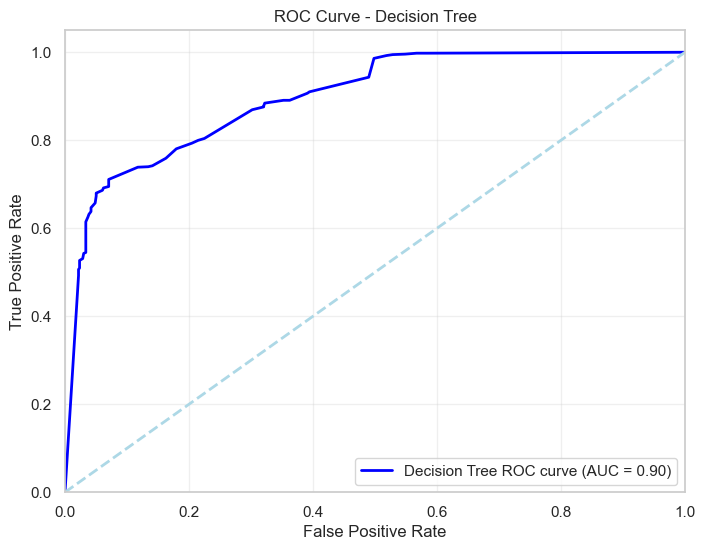

In [161]:
# Računanje FPR, TPR i AUC
fpr, tpr,_ = roc_curve(y_test, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plotovanje ROC krive
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')  # random classifier linija
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Na grefičkom prikazu stabla možemo videti na koji način smo vršili klasifikaciju i donosili odluku o pripadanju odredjenoj klasi

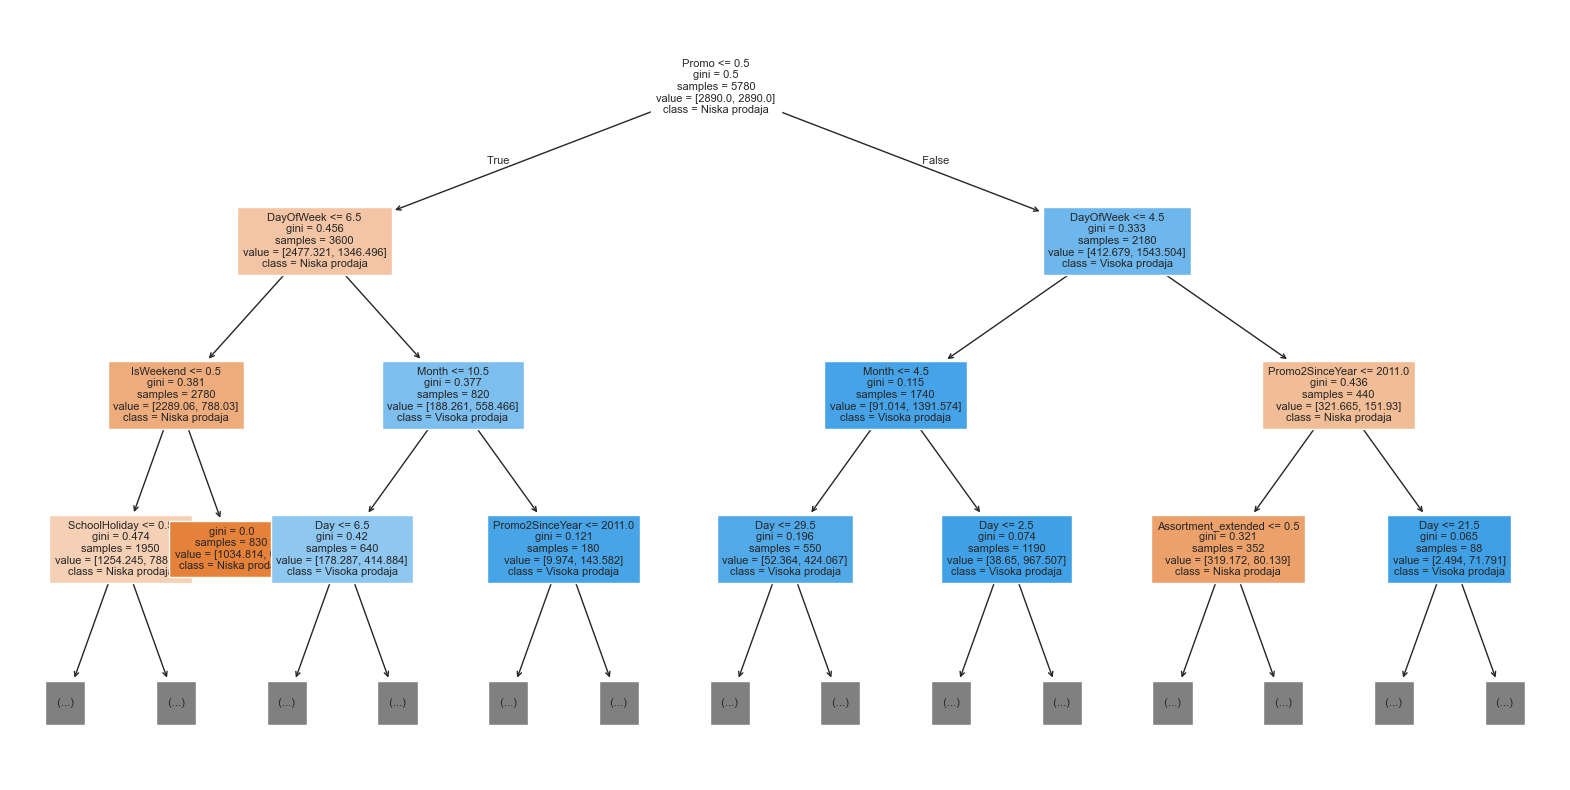

In [162]:
# Izvlacimo trenirano stablo iz pipeline-a
tree = best_model.named_steps['model']

# Izvlacimo feature imena nakon OneHot + remainder
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

# Cistimo od nepotrebnih prefiksa kako bi graf bio citljiviji
feature_names = [col.split("__", 1)[1] if "__" in col else col for col in feature_names]

# Prikazujemo stablo maksimalne dubine 3 
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=feature_names,
          class_names=["Niska prodaja", "Visoka prodaja"],  
          filled=True,
          max_depth=3,
          fontsize=8)
plt.show()

Prilikom kreiranja grafa ograničili smo dubinu stabla na 3 jer je model suviše kompleksan za prikazivanje. Na osnovu grafika moežemo da vidimo najznačajnije atribute tj. atribute koji najviše smanjuju gini index odnosno imaju najveću informacionu dobit. Najveci uticaj na odluku je imala promocija i dan u nedelji. 

Sada cemo na još jedan način prikazati značajnost naših atributa prilikom predvidjanja visoke prodaje.

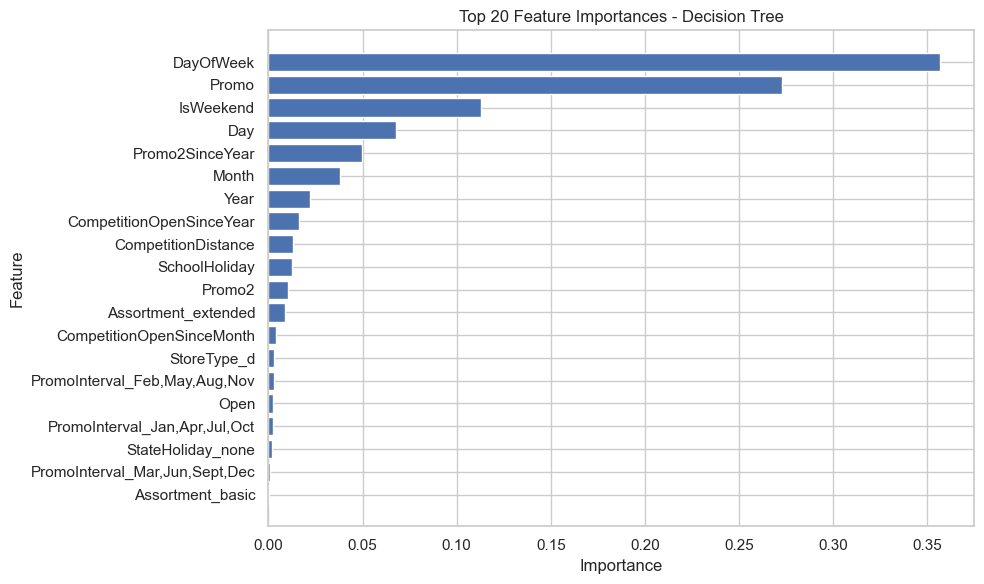

In [163]:
# Dobijanje imena kolona iz preprocesora
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
# Cistimo od nepotrebnih prefiksa kako bi graf bio citljiviji
feature_names = [col.split("__", 1)[1] if "__" in col else col for col in feature_names]

# Izvlacenje važnosti karakteristika iz stabla
importances = best_model.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:20][::-1], feat_imp['Importance'][:20][::-1])
plt.title('Top 20 Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # isti preprocessor koji smo već definisali 
    ('model', RandomForestClassifier(random_state=42,class_weight='balanced'))
])

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [10,20,30],
    'model__min_samples_leaf': [5,10,20],
    'model__max_features': ['sqrt', 'log2']
}

cv = TimeSeriesSplit(n_splits=5)

grid_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)



grid_rf.fit(X_train, y_train)

print("\n=== Random Forest - najbolji parametri ===")
print(grid_rf.best_params_)
print("Najbolji CV F1:", grid_rf.best_score_)
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits

=== Random Forest - najbolji parametri ===
{'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Najbolji CV F1: 0.8405026430470208


In [165]:
y_val_pred_rf = best_rf.predict(X_test)
y_val_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n=== RANDOM FOREST - rezultati na validation skupu ===")
print("Accuracy:", accuracy_score(y_test, y_val_pred_rf))
print("F1-score:", f1_score(y_test, y_val_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_val_proba_rf))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_val_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_val_pred_rf))


=== RANDOM FOREST - rezultati na validation skupu ===
Accuracy: 0.8516339869281045
F1-score: 0.87828418230563
ROC-AUC: 0.9279870801776295

Confusion matrix:
 [[484 112]
 [115 819]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       596
           1       0.88      0.88      0.88       934

    accuracy                           0.85      1530
   macro avg       0.84      0.84      0.84      1530
weighted avg       0.85      0.85      0.85      1530



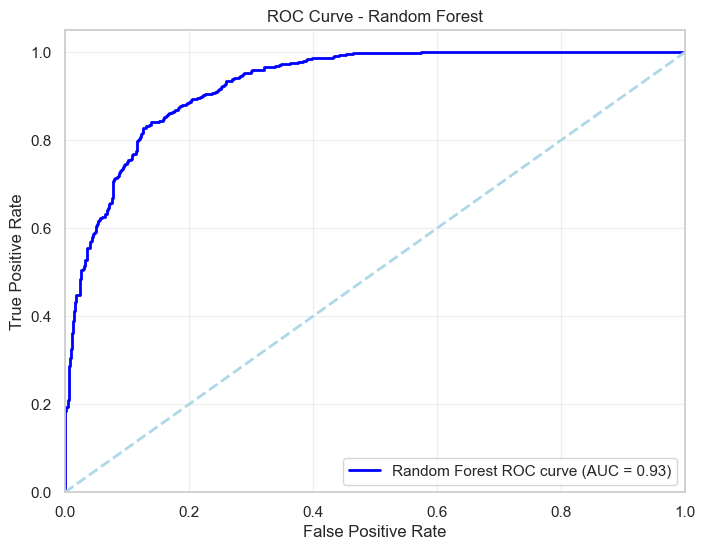

In [166]:
fpr, tpr,_ = roc_curve(y_test, y_val_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')  # random classifier linija
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## Ada Boost

In [167]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', AdaBoostClassifier(random_state=42))
])

param_grid_ada = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
}

cv = TimeSeriesSplit(n_splits=5)

grid_ada = GridSearchCV(
    estimator=ada_pipeline,
    param_grid=param_grid_ada,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=2
)


grid_ada.fit(X_train, y_train)

print("\n=== AdaBoost - najbolji parametri ===")
print(grid_ada.best_params_)
print("Najbolji CV F1:", grid_ada.best_score_)
best_ada = grid_ada.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits

=== AdaBoost - najbolji parametri ===
{'model__learning_rate': 1.0, 'model__n_estimators': 200}
Najbolji CV F1: 0.8228198715017736


In [168]:
y_val_pred_ada = best_ada.predict(X_test)
y_val_proba_ada = best_ada.predict_proba(X_test)[:, 1]

print("\n=== ADABOOST - rezultati na validation skupu ===")
print("Accuracy:", accuracy_score(y_test, y_val_pred_ada))
print("F1-score:", f1_score(y_test, y_val_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, y_val_proba_ada))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_val_pred_ada))
print("\nClassification report:\n", classification_report(y_test, y_val_pred_ada))


=== ADABOOST - rezultati na validation skupu ===
Accuracy: 0.8006535947712419
F1-score: 0.8469643753135976
ROC-AUC: 0.8846431599672334

Confusion matrix:
 [[381 215]
 [ 90 844]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.71       596
           1       0.80      0.90      0.85       934

    accuracy                           0.80      1530
   macro avg       0.80      0.77      0.78      1530
weighted avg       0.80      0.80      0.80      1530



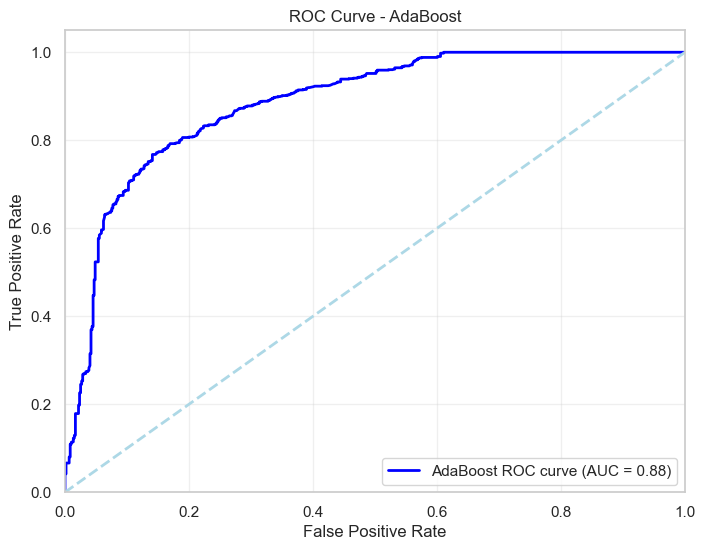

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_val_proba_ada)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AdaBoost ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')  # random classifier linija
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Na osnovu evaluacije tri korišćena modela smatramo da najbolje rezultate daje Random Forest jer pri njegovom korišćenju metrike F1 i površina ispod ROC krive imaju najveće vrednosti. Takodje možemo zaključiti da sva tri modela daju solidne rezultate.

In [170]:
final_best_model=best_rf
y_pred_test_final = best_model.predict(test)

In [171]:
submission = pd.DataFrame({
    "id": range(1, len(y_pred_test_final) + 1),
    "value": y_pred_test_final
})
submission

,id,value
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1525,1526,1
1526,1527,1
1527,1528,1
1528,1529,1
